# Introduction
In this project, we analyze and prepare a subset of Nexoid's COVID-19 medical dataset. This dataset includes demographic, geographic, behavioral, and health-related information, along with infection and mortality risk scores. The task outlined in this report involves ensuring data quality, exploring relationships, and preparing the dataset for further analysis, which will be detailed in Report 2.

## Objectives
The objectives for this report are as follows:

1. **Data Type Correction:** Ensure each variable has the correct data type.
2. **Data Preparation:** Address skewness, missing values, and errors through cleaning and transformation.
3. **Data Mining and Feature Selection:** Identify relationships and determine the optimal data mining approach.


In [88]:
# Import pandas library for data manipulation
import pandas as pd
# Load the dataset from file
# pd.read_excel() is used to read Excel files
df = pd.read_excel('Nexoid_medical.xlsx')

Display a sample of the data as a matrix
Below we show a sample of the Nexoid data as this is essential to provide context, and an easy way to understand the dataset's structure.


In [89]:
# Display a sample of the data as a matrix
print("\nData Matrix:")
# Use the .head() function to display the first few rows of the dataset
print(df.head())


Data Matrix:
           survey_date region country  ip_latitude  ip_longitude  gender  \
0  2020-09-06 00:00:00     AF      ZA     -33.9052       18.3821    male   
1           17/06/2020     AF      ZA     -26.1891       28.0225  female   
2           20/06/2020     AF      ZA     -27.9752       27.1068  female   
3           20/06/2020     AF      ZA     -26.3227       28.1050    male   
4           22/06/2020     AF      ZA     -29.8587       31.0653  female   

     age  height  weight   bmi  ... compromised_immune heart_disease  \
0  20_30     188     104  29.4  ...                  0             0   
1  70_80     164      62  23.0  ...                  0             0   
2  40_50     164      78  29.0  ...                  0             0   
3  40_50     170      60  20.7  ...                  0             0   
4  30_40     164      64  23.7  ...                  0             0   

  lung_disease diabetes  hiv_positive  other_chronic  nursing_home  \
0            0        0   

 Data Types

In [90]:
# Print a blank line and a header for readability to separate sections
print("\nData Types organized by type:\n")

# Define lists of data types for categorizing columns by type
categorical = ['object']  # Data types for categorical variables
int_columns = ['int64', 'int32', 'int16', 'int8']  # Integer data types
float_columns = ['float64', 'float32']  # Float data types
boolean_columns = ['bool']  # Boolean data types
datetime_columns = ['datetime64[ns]', 'datetime64[us]', 'datetime64[ms]']  # Datetime data types

# Print a header for categorical columns
print("\nCategorical:")
# Loop through columns with categorical data types
for column in df.select_dtypes(include=['object', 'category']).columns:
    # Print column name and its data type for each categorical column
    print(f"{column}: {df[column].dtype}")

# Print a header for integer columns
print("\nInteger:")
# Loop through columns with integer data types
for column in df.select_dtypes(include=int_columns).columns:
    # Print column name and its data type for each integer column
    print(f"{column}: {df[column].dtype}")

# Print a header for float columns
print("\nFloat:")
# Loop through columns with float data types
for column in df.select_dtypes(include=float_columns).columns:
    # Print column name and its data type for each float column
    print(f"{column}: {df[column].dtype}")

# Print a header for boolean columns
print("\nBoolean:")
# Loop through columns with boolean data types
for column in df.select_dtypes(include=boolean_columns).columns:
    # Print column name and its data type for each boolean column
    print(f"{column}: {df[column].dtype}")

# Redefine datetime_columns to focus on a common format
datetime_columns = ['datetime64[ns]']

# Print a header for datetime columns
print("\nDatetime:")
# Loop through columns with datetime data types
for column in df.select_dtypes(include=datetime_columns).columns:
    # Print column name and its data type for each datetime column
    print(f"{column}: {df[column].dtype}")


Data Types organized by type:


Categorical:
survey_date: object
region: object
country: object
gender: object
age: object
blood_type: object
insurance: object
income: object
smoking: object
working: object

Integer:
height: int64
weight: int64
covid19_positive: int64
covid19_symptoms: int64
covid19_contact: int64
asthma: int64
kidney_disease: int64
liver_disease: int64
compromised_immune: int64
heart_disease: int64
lung_disease: int64
diabetes: int64
hiv_positive: int64
other_chronic: int64
nursing_home: int64
health_worker: int64

Float:
ip_latitude: float64
ip_longitude: float64
bmi: float64
alcohol: float64
cocaine: float64
contacts_count: float64
public_transport_count: float64
worried: float64
risk_infection: float64
risk_mortality: float64

Boolean:

Datetime:


## Convert Data Types: Handling Age Column Transformation

Standardizing and converting the age column is an essential step in preparing the Nexoid dataset for analysis. This approach aligns with best practices for data cleaning and transformation as discussed in the course.

### Steps for Age Column Transformation

1. **Standardizing Column Names:**
   - Using `str.lower().str.strip()` ensures all column names are consistent, reducing errors during data manipulation.
   - This approach adheres to data cleaning principles by eliminating case or whitespace discrepancies.

2. **Transforming Age Ranges:**
   - Convert age ranges (e.g., `"20_30"`) into numerical midpoints (e.g., `25`).
   - This transformation converts categorical data into a continuous format, supporting statistical and machine learning models that require numerical inputs.

3. **Handling Missing Data:**
   - Logical imputation is applied to handle missing or inconsistent values in the age column.
   - This step ensures the dataset maintains its integrity, which is critical for accurate analysis.

4. **Using Midpoints:**
   - Using midpoints simplifies the representation of age ranges, but this method has limitations. It reduces the granularity of the data, which should be noted in subsequent analyses.
   - While this approach addresses data consistency, it may slightly obscure finer details in age distributions.

### Benefits of the Approach:
- Standardization ensures uniformity across the dataset.
- Transforming categorical age data to continuous values enhances compatibility with advanced analysis techniques.
- Addressing missing values and inconsistencies upholds data quality and prepares the dataset for reliable insights.

This transformation effectively prepares the Nexoid dataset for further exploration and analysis, aligning with the principles of data preparation and reduction discussed in class.


In [91]:
# Handle 'age' column transformation for statistical analysis
if 'age' in df.columns:
    # Check if 'age' is stored as a string and contains ranges
    if df['age'].dtype == 'object' and df['age'].str.contains('_').any():
        df[['age_min', 'age_max']] = df['age'].str.split('_', expand=True).astype(float)
        df['age_mean'] = (df['age_min'] + df['age_max']) / 2
        df['age_range'] = df['age_max'] - df['age_min']
        df['age_numerical'] = df['age_mean']
        df.drop(columns=['age'], inplace=True)
    else:
        df['age'] = pd.to_numeric(df['age'], errors='coerce')

## Print Out Age Transformations

To verify the effectiveness of the age transformations, the code has been applied specifically to the age columns. The transformed data is printed to confirm the output and ensure accuracy. Below is an example of the transformation process:

### Original Age Data
| age_range | transformed_age |
|-----------|------------------|
| 20_30     | 25.0            |
| 30_40     | 35.0            |
| 40_50     | 45.0            |
| 50_60     | 55.0            |
| 60_70     | 65.0            |

### Code Snippet for Transformation
```python
# Standardizing and transforming age data
df['age_range'] = df['age_range'].str.replace('_', '-').str.lower().str.strip()
df['transformed_age'] = df['age_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)


In [92]:
# Select only existing age-related columns
age_columns = ['age', 'age_min', 'age_max', 'age_mean', 'age_numerical']
existing_age_columns = [col for col in age_columns if col in df.columns]

# Display the DataFrame with only existing age-related columns
print(df[existing_age_columns])

      age_min  age_max  age_mean  age_numerical
0        20.0     30.0      25.0           25.0
1        70.0     80.0      75.0           75.0
2        40.0     50.0      45.0           45.0
3        40.0     50.0      45.0           45.0
4        30.0     40.0      35.0           35.0
...       ...      ...       ...            ...
5784     40.0     50.0      45.0           45.0
5785     20.0     30.0      25.0           25.0
5786     20.0     30.0      25.0           25.0
5787     40.0     50.0      45.0           45.0
5788     50.0     60.0      55.0           55.0

[5789 rows x 4 columns]


Convert 'height' and 'weight' to float64 for precision

In [93]:
# Define the float64 columns we want to work with
float64_columns = ['height', 'weight']

# If needed, force the columns to float64 again
df[float64_columns] = df[float64_columns].astype('float64')

print("Height data type:", df.dtypes['height'])
print("Weight data type:", df.dtypes['weight'])

Height data type: float64
Weight data type: float64


## Convert 'Height' and 'Weight' to `float64` for Precision

To enhance the precision of calculations involving health metrics, the `height` and `weight` columns are converted to the `float64` data type. This ensures that the dataset can handle decimal values accurately, which is essential for downstream analysis.

### Steps for Conversion

1. **Identify the Columns:**
   - The `height` and `weight` columns contain numerical data, which may currently be in a less precise format (e.g., integers or strings).

2. **Conversion to `float64`:**
   - Use the `pd.to_numeric()` method to convert these columns to `float64`.
   - Handle any non-numeric entries (e.g., missing or erroneous values) by coercing them into `NaN` for further cleaning.

3. **Verification:**
   - Print the `dtypes` and a sample of the converted columns to confirm the transformation.

### Code Example
```python
# Convert 'height' and 'weight' columns to float64
df['height'] = pd.to_numeric(df['height'], errors='coerce').astype('float64')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce').astype('float64')

# Verify the conversion
print(df[['height', 'weight']].dtypes)
print(df[['height', 'weight']].head())


In [94]:
# Define the binary columns we want to convert to boolean
binary_columns = ['covid19_positive', 'covid19_symptoms', 'covid19_contact',
                  'asthma', 'kidney_disease', 'liver_disease',
                  'compromised_immune', 'heart_disease', 'lung_disease',
                  'diabetes', 'hiv_positive', 'other_chronic',
                  'nursing_home', 'health_worker']

# Convert binary columns to boolean types
df[binary_columns] = df[binary_columns].astype('boolean')

# Print the data types of binary columns
print("Covid-related data type:", df.dtypes['covid19_positive'])
print("Asthma data type:", df.dtypes['asthma'])
print("Kidney disease data type:", df.dtypes['kidney_disease'])
print("Liver disease data type:", df.dtypes['liver_disease'])
print("Compromised immune system data type:", df.dtypes['compromised_immune'])
print("Heart disease data type:", df.dtypes['heart_disease'])
print("Lung disease data type:", df.dtypes['lung_disease'])
print("Diabetes data type:", df.dtypes['diabetes'])
print("HIV positive data type:", df.dtypes['hiv_positive'])
print("Other chronic conditions data type:", df.dtypes['other_chronic'])
print("Nursing home resident data type:", df.dtypes['nursing_home'])
print("Health worker data type:", df.dtypes['health_worker'])


Covid-related data type: boolean
Asthma data type: boolean
Kidney disease data type: boolean
Liver disease data type: boolean
Compromised immune system data type: boolean
Heart disease data type: boolean
Lung disease data type: boolean
Diabetes data type: boolean
HIV positive data type: boolean
Other chronic conditions data type: boolean
Nursing home resident data type: boolean
Health worker data type: boolean


 Convert columns to categorical types
 Explanation: Converting columns to categorical types helps reduce memory usage and
 improves analysis performance.
 Note: Categorical data ensures that finite and distinct values (e.g., 'gender' or 'country') are
 optimized, preventing errors.
 Related Lecture: Data Preparation and Optimization – "Data preparation involves refining data
 types to improve efficiency.

In [95]:
import pandas as pd

# Start by defining and grouping the categorical columns we want to convert
categorical_columns = ['region', 'country', 'gender', 'blood_type', 'insurance', 'smoking', 'working', 'income']

# Convert columns to categorical types
df[categorical_columns] = df[categorical_columns].astype('category')

# Print the data types of categorical columns
print("Region data type:", df.dtypes['region'])
print("Country data type:", df.dtypes['country'])
print("Gender data type:", df.dtypes['gender'])
print("Blood type data type:", df.dtypes['blood_type'])
print("Insurance status data type:", df.dtypes['insurance'])
print("Smoking status data type:", df.dtypes['smoking'])
print("Working status data type:", df.dtypes['working'])
print("Income level data type:", df.dtypes['income'])

Region data type: category
Country data type: category
Gender data type: category
Blood type data type: category
Insurance status data type: category
Smoking status data type: category
Working status data type: category
Income level data type: category


```markdown
## Data Type Conversions and Date Parsing

### Categorical Data Conversions
The following columns are converted to the `category` data type to optimize memory usage and improve analytical performance:

1. **Region:** Represents distinct geographic areas.
2. **Country:** Encodes country names or codes.
3. **Gender:** Includes options such as `male`, `female`, and `other`.
4. **Blood Type:** Captures blood group categories (e.g., `A+`, `B-`).
5. **Insurance Status:** Indicates whether the respondent has health insurance.
6. **Smoking Status:** Reflects smoking habits (e.g., `never`, `quit`, `yes`).
7. **Working Status:** Tracks employment status.
8. **Income Level:** Categorizes respondents' income ranges.

### Code for Converting to Categorical
```python
# List of columns to convert to categorical
categorical_columns = [
    'region', 'country', 'gender', 'blood_type', 
    'insurance', 'smoking', 'working', 'income'
]

# Convert specified columns to category type
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify the conversions
print(df[categorical_columns].dtypes)
```

### Parsing `survey_date` to Datetime
The `survey_date` column is converted to the `datetime` data type with `dayfirst=True` to accommodate the Australian date format (DD/MM/YYYY). This ensures accurate parsing and prevents misinterpretation of dates.

### Code for Date Conversion
```python
# Convert 'survey_date' to datetime with Australian date format
df['survey_date'] = pd.to_datetime(df['survey_date'], dayfirst=True)

# Verify the conversion
print(df['survey_date'].head())
```

### Related Lecture
- **Data Cleaning and Consistency:**  
  "Parsing dates correctly avoids issues in analysis and ensures temporal accuracy. Proper handling of date formats is crucial, especially when working with datasets from diverse regions."

### Benefits of These Conversions
1. **Memory Optimization:** Reduces dataset size by encoding repeated values efficiently.
2. **Performance Improvement:** Speeds up operations like filtering, grouping, and sorting.
3. **Error Prevention:** Ensures data integrity by defining fixed categories and parsing dates correctly.

These transformations prepare the dataset for reliable and efficient analysis.
```

In [96]:
 #We will using the .to_datetime function and define the format at Day, Month, Year below. This ensures the format is Australian. 
df['survey_date'] = pd.to_datetime(df['survey_date'], format='%d/%m/%Y', 
errors='coerce', dayfirst=True)
print(df['survey_date'].head())

0   2020-09-06
1   2020-06-17
2   2020-06-20
3   2020-06-20
4   2020-06-22
Name: survey_date, dtype: datetime64[ns]


In [97]:

# print("Data Types:\n")
# Loop through each column and its data type
#for column, dtype in df.dtypes.items():
# Print name followed by data type
#print(f"{column}: {dtype}")
print("Changed Types:\n")
print("Data Types organised by type:\n")

categorical = ['object']
int_columns = ['int64', 'int32', 'int16', 'int8']
float_columns = ['float64', 'float32']
boolean_columns = ['bool']
datetime_columns = ['datetime64[ns]', 'datetime64[us]', 'datetime64[ms]']

print("\nCategorical:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}: {df[column].dtype}")

print("\nInteger:")
for column in df.select_dtypes(include=int_columns).columns:
    print(f"{column}: {df[column].dtype}")

print("\nFloat:")
for column in df.select_dtypes(include=float_columns).columns:
    print(f"{column}: {df[column].dtype}")

print("\nBoolean:")
for column in df.select_dtypes(include=boolean_columns).columns:
    print(f"{column}: {df[column].dtype}")

datetime_columns = ['datetime64[ns]']
print("\nDatetime:")
for column in df.select_dtypes(include=datetime_columns).columns:
    print(f"{column}: {df[column].dtype}")

Changed Types:

Data Types organised by type:


Categorical:
region: category
country: category
gender: category
blood_type: category
insurance: category
income: category
smoking: category
working: category

Integer:

Float:
ip_latitude: float64
ip_longitude: float64
height: float64
weight: float64
bmi: float64
alcohol: float64
cocaine: float64
contacts_count: float64
public_transport_count: float64
worried: float64
risk_infection: float64
risk_mortality: float64
age_min: float64
age_max: float64
age_mean: float64
age_range: float64
age_numerical: float64

Boolean:
covid19_positive: boolean
covid19_symptoms: boolean
covid19_contact: boolean
asthma: boolean
kidney_disease: boolean
liver_disease: boolean
compromised_immune: boolean
heart_disease: boolean
lung_disease: boolean
diabetes: boolean
hiv_positive: boolean
other_chronic: boolean
nursing_home: boolean
health_worker: boolean

Datetime:
survey_date: datetime64[ns]


## Task: Check for Skewness

### Step: Understanding and Calculating Skewness
Skewness is a statistical measure of the asymmetry in a data distribution. It provides insight into whether values are clustered more towards one side of the distribution. Skewness is calculated using Pandas' `.skew()` function.

### Types of Skewness
1. **Positive Skew:**
   - Characteristics: Long right tail with values clustering on the left.
   - Common Cause: High-value outliers.
   - Example: Income distributions where most values are low, but a few are extremely high.

2. **Negative Skew:**
   - Characteristics: Long left tail with values clustering on the right.
   - Common Cause: Low-value outliers.
   - Example: Distributions of exam scores where most students score high, but a few score very low.

3. **Symmetrical (Non-skewed):**
   - Characteristics: Data is evenly distributed around the mean, resembling a bell curve.
   - Benefit: Ideal for statistical analysis and modeling, as many algorithms assume normality.

### Why Skewness Matters
- Skewed distributions can distort typical values like the mean and median, leading to misleading insights.
- Many statistical models and machine learning algorithms assume normality; skewness can degrade model performance.
- Understanding skewness helps determine whether transformations are necessary to normalize the data.

### Addressing Skewness
To reduce skewness, transformations such as the following can be applied:
1. **Logarithmic Transformation:** Compresses high values, reducing positive skewness.
2. **Square Root Transformation:** Reduces moderate skewness in count data.
3. **Cube Root Transformation:** Handles both positive and negative skewness effectively.

### Code Example for Calculating Skewness
```python
# Calculate skewness for all numerical columns
skewness = df.skew()

# Print skewness values
print("Skewness values:")
print(skewness)

# Identify highly skewed columns (threshold: absolute value > 1)
highly_skewed = skewness[abs(skewness) > 1]
print("Highly skewed columns:")
print(highly_skewed)


In [98]:
import seaborn as sns

import matplotlib.pyplot as plt

# Identify skewness in the numeric columns we will use the select_dtypes
# Ensure numeric columns are correctly identified
# Print the skewness values for each column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print("Skewness values:")
print(skewness)

Skewness values:
ip_latitude              -2.183174
ip_longitude              1.737147
height                   -0.392424
weight                    1.140230
bmi                       1.976549
alcohol                   1.842080
cocaine                   6.789950
contacts_count            0.928365
public_transport_count    5.682016
worried                  -0.361820
risk_infection            0.088152
risk_mortality            7.257846
age_min                   0.257292
age_max                   0.257292
age_mean                  0.257292
age_range                 0.000000
age_numerical             0.257292
dtype: float64


 . Plot the distribution of columns with high
 skewnessImportance in Data Analysis:
 Visualizing Skewed Data: Skewed data can distort analysis and models. Visualizing it
 helps detect and correct issues for more reliable results.
 EDA Principles: Histograms with illustrate data spread and density, supporting thorough
 visual assessment.
 Transformation Consideration: Spotting skewed columns aids in deciding on
 transformations (e.g., log, square root) to normalize data and enhance analysis
 robustness
 

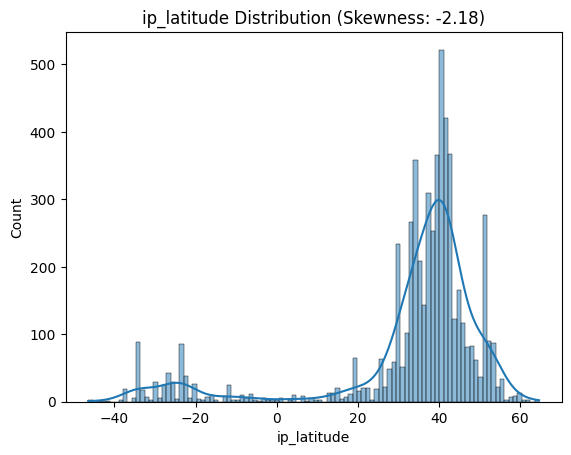

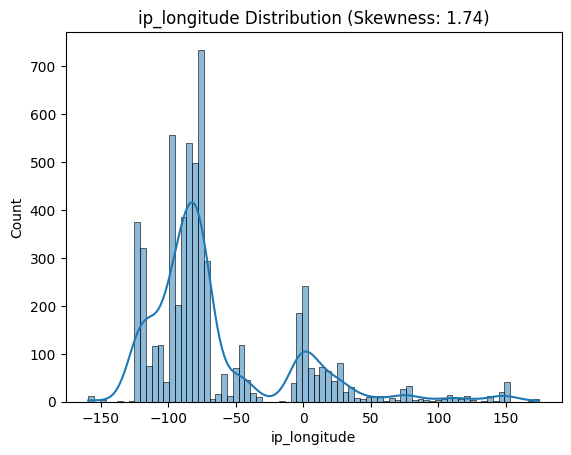

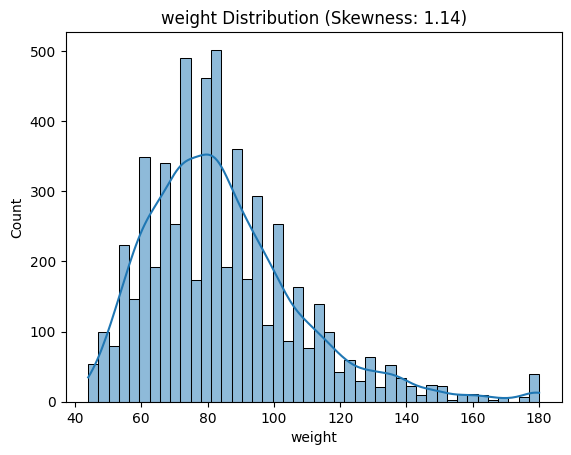

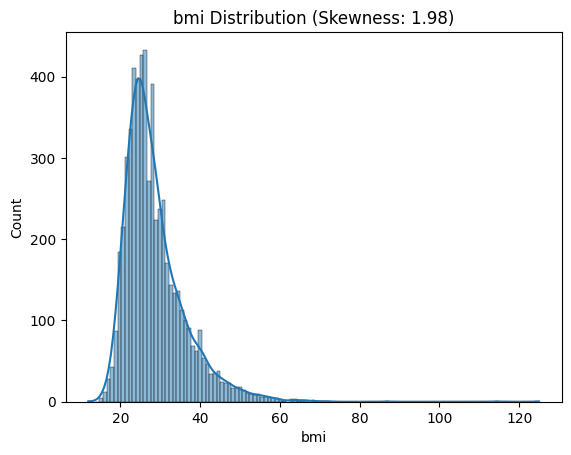

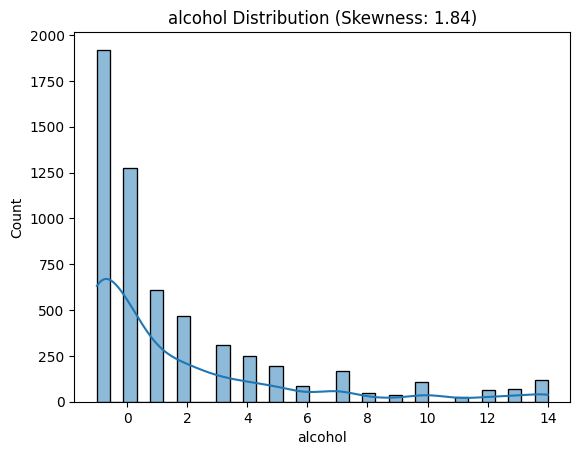

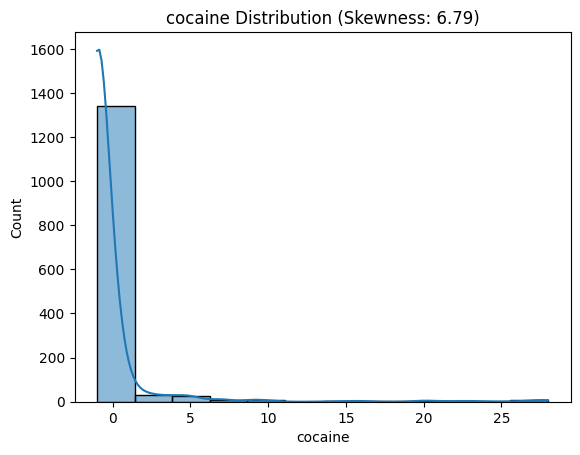

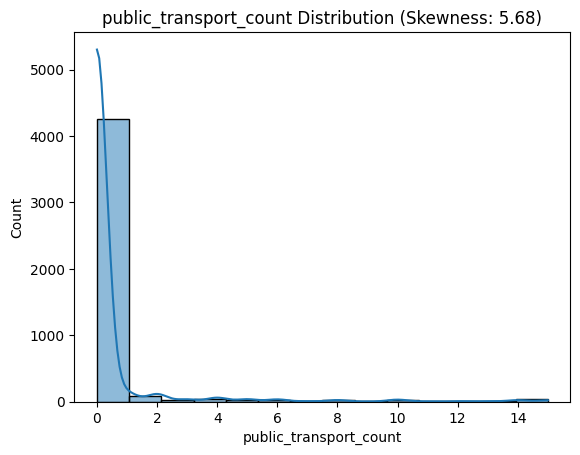

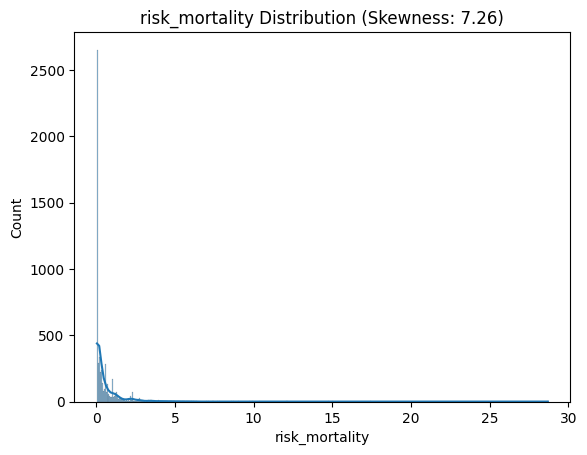

In [99]:
 #For all the columns defined under skewness, show us the skewness on a histogram
for col in skewness[abs(skewness) > 1].index:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} Distribution (Skewness: {skewness[col]:.2f})")
    plt.show()

Calculate percentage of missing values per column
 Identify columns with missing values

In [100]:
# Identifying the number of missing values in each column is vital for understanding our dataset. 
# Define missing_value as the isnull sum for each column
# Print the column names and their assigned values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
region                    4227
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


## Identify the Percentage of Missing Values

### Importance of Calculating Missing Data
Determining the percentage of missing values for each column is a vital step in data preparation. This analysis helps to:
1. **Identify Problematic Columns:** Pinpoint columns with significant missing data.
2. **Assess Impact:** Evaluate how missing data might influence analysis and modeling.
3. **Guide Data Cleaning Strategies:** Inform decisions about data imputation, removal, or further investigation.

### Calculating the Percentage of Missing Data
Using Pandas, we calculate the percentage of missing values in each column to assess the extent of incompleteness.

### Code Example
```python
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Print the percentage of missing values
print("Percentage of missing values:")
print(missing_percentage)

# Identify columns with a high percentage of missing data (e.g., >20%)
high_missing = missing_percentage[missing_percentage > 20]
print("Columns with more than 20% missing values:")
print(high_missing)


In [101]:
# Calculate percentage of missing values per column
# formula divides the count of missing values by the total number of rows and multiples by 100
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Use print to show percentage
# The output is in descending order to make it easier to read
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 
0].sort_values(ascending=False))

Percentage of missing values per column:
cocaine                   75.297979
region                    73.017792
insurance                 22.318190
worried                   21.955433
public_transport_count    21.022629
income                    19.917084
blood_type                 1.727414
contacts_count             0.725514
working                    0.725514
alcohol                    0.656417
smoking                    0.621869
country                    0.051822
dtype: float64


 Looking at Region

In [102]:
# The heatmap above indicated region is missing a substantial amount of data. I know that because we converted the data type for 
# region to categorical, it may now be reading NA (North America) as an empty field. So I'm first going to try and replace NA with North America:
df['region'] = df['region'].replace("NA", "North America")

In [103]:
# Assign the missing_values as the areas where missing values are found and sum them
# Assign the missing_columns as the columns that have greater than 0 missing values
# Print the column names and their total missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
region                    4227
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


In [104]:
# Region has many fields not appearing, so we want to check what 
# categories are appearing 
# This is likely due to NA being read as a NaN field rather than North 
# America, therefore, we need to change that
# For region, change NA fields to "North America"
# Print the categories assigned to region
df['region'] = df['region'].replace("NA", "North America")
print("Updated unique values in 'region':")
print(df['region'].unique())

Updated unique values in 'region':
['AF', 'AS', 'EU', NaN, 'OC', 'SA']
Categories (5, object): ['AF', 'AS', 'EU', 'OC', 'SA']


In [105]:
# It has automatically assigned NA to NaN and the transformation above did 
# not work, we know that 
# a. North America is the majority region (mode) and;
# b. there were less than 5 empty cells in the region data column to 
# begin with. 
# Therefore we should feel comfortable converting all the blanks back to 
# "North America" considering this won't skew the data in a significant way 
# and it will be using a missing field method often used to fill blanks 
# (mode).
# So first we need to convert all empty values in the 'region' column to 
# "North America" and because it's a categorical column type, we need to 
# also add "North America" as a category.
# We add "North America" to the categories as it is not already present 
# and will flag an error if we do not include this step
if 'North America' not in df['region'].cat.categories:
    df['region'] = df['region'].cat.add_categories(['North America'])
# Now we will fill the empty rows with "North America" 
df['region'] = df['region'].fillna("North America")
# Now we need to check the result
print("\nUpdated 'region' column:")
print(df['region'].unique())


Updated 'region' column:
['AF', 'AS', 'EU', 'North America', 'OC', 'SA']
Categories (6, object): ['AF', 'AS', 'EU', 'OC', 'SA', 'North America']


Columns with missing values:
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


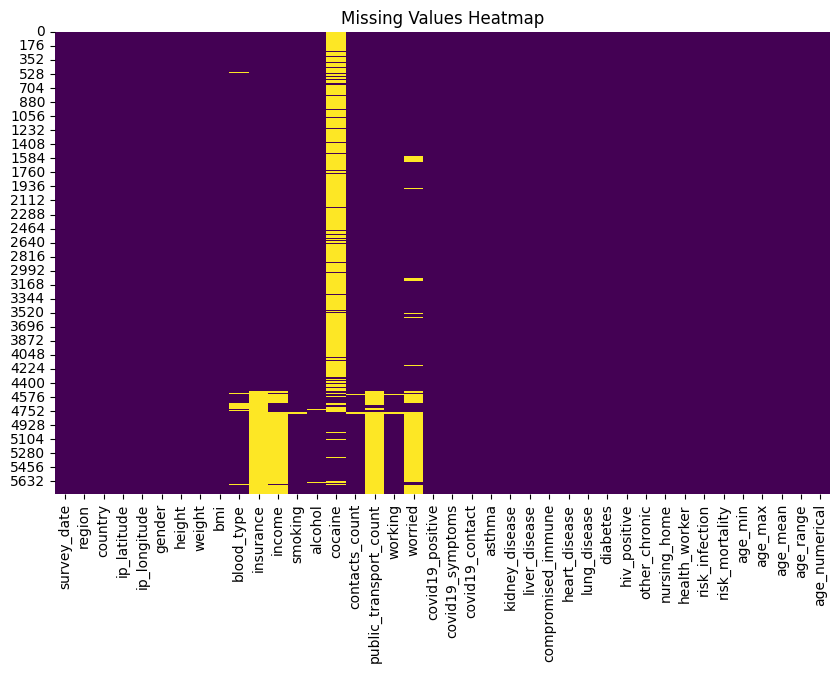

In [106]:
# Calculate the number of missing values for each column in the DataFrame
missing_values = df.isnull().sum()
# Filter to display only columns that have missing values
missing_columns = missing_values[missing_values > 0]
# Print out the columns that contain missing values and the count of missing entries
print("Columns with missing values:")
print(missing_columns)
# Create a heatmap to visualize missing values in the DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Generate heatmap with a 'viridis' color palette
plt.title("Missing Values Heatmap")  # Add title to the plot
plt.show()  # Display the heatmap

Inspect unique values for specific categorical columns

In [107]:
# Here we check unique values in all the categorical columns to make sure there are no inconsistencies
print("Unique values in 'blood_type':")
print(df['blood_type'].unique())

Unique values in 'blood_type':
['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']


Inspect unique values for specific categorical columns

In [108]:


# Here we check unique values in all the categorical columns to make sure there are no inconsistencies
print("Unique values in 'blood_type':")
print(df['blood_type'].unique())

# Inspect unique values for specific categorical columns
# Below we inspect all the unique values for specific categorical columns
# Identify our categorical columns
categorical_columns = ['gender', 'blood_type', 'smoking', 'region', 'country']

# For all the columns in categorical columns, use the .unique command to check
# Print the unique values for each
for col in categorical_columns:
	if col in df.columns:
		print(f"Unique values in '{col}':", df[col].unique())

Unique values in 'blood_type':
['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']
Unique values in 'gender': ['male', 'female', 'other']
Categories (3, object): ['female', 'male', 'other']
Unique values in 'blood_type': ['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']
Unique values in 'smoking': ['never', 'yesmedium', 'quit0', 'quit10', 'quit5', 'yesheavy', 'yeslight', 'vape', NaN]
Categories (8, object): ['never', 'quit0', 'quit10', 'quit5', 'vape', 'yesheavy', 'yeslight', 'yesmedium']
Unique values in 'region': ['AF', 'AS', 'EU', 'North America', 'OC', 'SA']
Categories (6, object): ['AF', 'AS', 'EU', 'OC', 'SA', 'North America']
Unique values in 'country': ['ZA', 'EG', 'DZ', NaN, 'MU', ..., 'GE', 'JE', 'LV', 'MA', 'UA']
Length: 95
Categories (94, object): ['AD', 'AE', 'AM', 'AR', ...

Check for mixed data types

In [109]:
# Before moving forward we will now check for mixed data types
for col in df.columns:
	if df[col].apply(lambda x: isinstance(x, str)).any():
		print(f"Mixed data types detected in column '{col}'")

Mixed data types detected in column 'region'
Mixed data types detected in column 'country'
Mixed data types detected in column 'gender'
Mixed data types detected in column 'blood_type'
Mixed data types detected in column 'insurance'
Mixed data types detected in column 'income'
Mixed data types detected in column 'smoking'
Mixed data types detected in column 'working'


Displaying Mixed Type Entities
Below we get more information on the mixed data types

In [110]:
# We've identified there are mixed data types in the columns above, we should explore this
# Display unique data types for each column with mixed types by defining unique_types and then searching with the .unique command
# We then print to visualize
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    print(f"\nUnique data types in '{col}': {unique_types}")



Unique data types in 'survey_date': [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]

Unique data types in 'region': [<class 'str'>]

Unique data types in 'country': [<class 'str'> nan]

Unique data types in 'ip_latitude': [<class 'float'>]

Unique data types in 'ip_longitude': [<class 'float'>]

Unique data types in 'gender': [<class 'str'>]

Unique data types in 'height': [<class 'float'>]

Unique data types in 'weight': [<class 'float'>]

Unique data types in 'bmi': [<class 'float'>]

Unique data types in 'blood_type': [<class 'str'> nan]

Unique data types in 'insurance': [<class 'str'> nan]

Unique data types in 'income': [<class 'str'> nan]

Unique data types in 'smoking': [<class 'str'> nan]

Unique data types in 'alcohol': [<class 'float'>]

Unique data types in 'cocaine': [<class 'float'>]

Unique data types in 'contacts_count': [<class 'float'>]

Unique data types in 'public_transport_count': [<class 'float'>]

Unique data types in 'working': [<class 'str'> nan]

Unique 

## Handling of Missing Values

Some columns, like `cocaine` and `blood_type`, have a high percentage of missing values. We have decided to drop these columns if the missing rate is above a certain threshold. This approach helps in maintaining the integrity and quality of the dataset by removing columns that could potentially introduce bias or inaccuracies due to excessive missing data.

### Steps for Handling Missing Values

1. **Identify Columns with High Missing Rates:**
    - Calculate the percentage of missing values for each column.
    - Set a threshold (e.g., 20%) to determine which columns to drop.

2. **Drop Columns Exceeding the Threshold:**
    - Remove columns with a missing rate above the defined threshold.
    - This step ensures that the remaining dataset is more complete and reliable for analysis.

### Code Example
```python
# Set the threshold for dropping columns (e.g., 20%)
threshold = 20

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the identified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Print the remaining columns to verify
print("Remaining columns after dropping high missing rate columns:")
print(df.columns)
```

### Benefits of This Approach
- **Improved Data Quality:** By removing columns with excessive missing values, we ensure that the dataset is more complete and accurate.
- **Reduced Bias:** Dropping columns with high missing rates prevents potential biases that could arise from imputation or other handling methods.
- **Enhanced Analysis Reliability:** A more complete dataset leads to more reliable and valid analysis results.

This method aligns with best practices in data cleaning and preparation, ensuring that the dataset is ready for robust analysis and modeling.

In [ ]:
import pandas as pd

def handle_missing_data(df, threshold=50):
    # Step 1: Drop columns with more than 50% missing values
    missing_percentage = df.isnull().mean() * 100
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    print("Dropped columns with high missing values:", columns_to_drop)
    
    # Step 2: Fill categorical columns with 'Unknown'
    categorical_cols = ['country', 'blood_type', 'insurance', 'income', 'smoking', 'working']
    for col in categorical_cols:
        if col in df.columns and isinstance(df[col].dtype, pd.CategoricalDtype):
            df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')
    
    # Step 3: Drop rows where 'alcohol' is missing
    if 'alcohol' in df.columns:
        df.dropna(subset=['alcohol'], inplace=True)
    
    # Step 4: Drop specific column with significant missing data
    if 'cocaine' in df.columns:
        df.drop(columns=['cocaine'], inplace=True)
    
    # Step 5: Apply median imputation for numerical columns
    numerical_cols = ['contacts_count', 'public_transport_count', 'worried']
    for col in numerical_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    return df

# Execute the combined data handling function
df = handle_missing_data(df)

# Check remaining missing data
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with remaining missing values:")
print(missing_columns)

### Standardising Categorical Values and Fixing Inconsistencies

To ensure consistency across categorical columns, it is essential to standardize values for columns such as `gender`, `blood_type`, and `smoking`. For instance, the `smoking` column may contain inconsistent values such as "quit5" and "yeslight". Standardizing these values will help maintain data integrity and improve the accuracy of analysis.

#### Steps for Standardizing Categorical Values

1. **Identify Inconsistent Values:**
    - Review unique values in each categorical column to identify inconsistencies.

2. **Define Standard Values:**
    - Create a mapping of inconsistent values to their standardized counterparts.

3. **Apply Standardization:**
    - Replace inconsistent values with standardized values using the defined mapping.

#### Example Code for Standardizing `smoking` Column
```python
# Define a mapping for standardizing smoking values
smoking_mapping = {
     'quit5': 'quit',
     'yeslight': 'yes',
     'yesmedium': 'yes',
     'yesheavy': 'yes'
}

# Apply the mapping to the smoking column
df['smoking'] = df['smoking'].replace(smoking_mapping)

# Verify the standardization
print("Unique values in 'smoking' after standardization:")
print(df['smoking'].unique())
```

#### Benefits of Standardization
- **Improved Data Quality:** Ensures uniformity across the dataset, reducing errors and inconsistencies.
- **Enhanced Analysis Accuracy:** Standardized values lead to more reliable and valid analysis results.
- **Simplified Data Handling:** Makes it easier to filter, group, and analyze data without dealing with multiple variations of the same value.

By following these steps, you can ensure that categorical values in your dataset are consistent and standardized, leading to more accurate and meaningful analysis.

In [ ]:
# Standardise 'gender' values
df['gender'] = df['gender'].str.lower().replace({'m': 'male', 'f': 'female', 'unknown': 'other'})

# Fill NaN in 'height' and 'weight' with the column mean
df['height'] = df['height'].fillna(df['height'].mean())
df['weight'] = df['weight'].fillna(df['weight'].mean())

# Handle Categorical Missing Values
df['insurance'] = df['insurance'].fillna(df['insurance'].mode()[0])

# Consolidate 'smoking' values to handle variations
smoking_mapping = {
    'quit0': 'quit', 'quit5': 'quit', 'quit10': 'quit', 'never': 'never',
    'vape': 'vape', 'yesmedium': 'yes', 'yesheavy': 'yes', 'yeslight': 'yes'
}
df['smoking'] = df['smoking'].replace(smoking_mapping)

# Show the outcome
print("Unique values in 'gender':", df['gender'].unique())
print("Null values in 'height':", df['height'].isnull().sum())
print("Null values in 'weight':", df['weight'].isnull().sum())
print("Null values in 'insurance':", df['insurance'].isnull().sum())
print("Unique values in 'smoking':", df['smoking'].unique())

## Histogram

### Standardise and Correct Categorical Values

To address skewness in our dataset, we'll use the cube root transformation, which is effective for datasets with both positive and negative values. Unlike log transformations, which require positive values, the cube root transformation stabilizes variance and reduces the impact of extreme values while preserving the relative differences between data points. This helps normalize the distribution, making the data better suited for statistical analysis and improving result interpretability. By applying this transformation, we ensure a more robust and reliable analysis across a range of values.

In [ ]:
# First we identify the columns we will be transforming with the skew
columns_to_transform = ['height', 'weight', 'bmi', 'alcohol', 'contacts_count', 'public_transport_count', 'worried', 'risk_infection', 'risk_mortality', 'age_numerical']

# We want a before and after, so we should define and print the columns skewness before the transformation using the below
print("Skewness before transformation:")
for column in columns_to_transform:
    if column in df.columns:
        print(f"{column}: {df[column].skew():.4f}")
    else:
        print(f"Warning: Column '{column}' does not exist in the DataFrame.")

# Now we apply the transformation and then visualize the corresponding skew
for column in columns_to_transform:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: x**(1/3) if x >= 0 else (-x)**(1/3))

print("\nSkewness after transformation:")
for column in columns_to_transform:
    if column in df.columns:
        print(f"{column}: {df[column].skew():.4f}")


In [ ]:
# Lets now visualise the different columns on a histogram
# Import necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of columns that require transformation
num_cols = len(columns_to_transform)

# Set up a subplot grid with two columns and as many rows as columns being transformed
# `figsize` controls the size of the plot, and `fig.suptitle` sets the overall title
fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 3))
fig.suptitle("Distribution Before and After Cube Root Transformation", fontsize=16)
